In [11]:
%matplotlib ipympl
from models import *
# from models import find_index_of_nearest
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# from arbitau import give_z_for_arbitary_tau, tau_plotter
from scipy.integrate import solve_bvp
# import mps


In [12]:
@element(num_params=4,units=["","","","",""],overwrite=True)
def arbitRCPEone(p,f):
    Q, alpha, a, b = p[0], p[1], p[2], p[3]
    
    def R(x):
        # return a/(1+b*x)
        return 100*(a*np.tanh(b**2-a*x)+np.tanh(a-b**2*x))
    
    def fun(x,y,lmdcos,lmdsin):
        return np.vstack((y[2]*R(x),y[3]*R(x),lmdcos*y[0]-lmdsin*y[1],lmdcos*y[1]+lmdsin*y[0]))

    def bc(ya,yb):
        return np.array([ya[0]-1,yb[2],yb[3],ya[1]])

    x=np.linspace(0,1,1000)
    y=np.zeros((4,x.size))
 
    Z_list=np.zeros((np.size(np.array(f))),dtype=complex)
    ii=0
    for freq in np.array(f):
        w=2*np.pi*freq
        lmdcos=w**alpha*Q*np.cos(alpha*np.pi/2)
        lmdsin=w**alpha*Q*np.sin(alpha*np.pi/2)
        sol1 = solve_bvp(lambda x,y: fun(x,y,lmdcos=lmdcos,lmdsin=lmdsin), bc, x, y)
        y3=sol1.sol(x)[2]
        y4=sol1.sol(x)[3]
        Z=2/(-(y3[0]+y4[0]*1j))
        Z_list[ii]=Z
        ii=ii+1
    return Z_list


In [13]:
@element(num_params=4,units=["","","","",""],overwrite=True)
def arbitRCPEtwo(p,f):
    Q, alpha, a, b = p[0], p[1], p[2], p[3]
    
    def R(x):
        return a/(1+b*x)
        # return 100*(a*np.tanh(b**2-a*x)+np.tanh(a-b**2*x))
    
    def fun(x,y,lmdcos,lmdsin):
        return np.vstack((y[2]*R(x),y[3]*R(x),lmdcos*y[0]-lmdsin*y[1],lmdcos*y[1]+lmdsin*y[0]))

    def bc(ya,yb):
        return np.array([ya[0]-1,yb[2],yb[3],ya[1]])

    x=np.linspace(0,1,1000)
    y=np.zeros((4,x.size))
 
    Z_list=np.zeros((np.size(np.array(f))),dtype=complex)
    ii=0
    for freq in np.array(f):
        w=2*np.pi*freq
        lmdcos=w**alpha*Q*np.cos(alpha*np.pi/2)
        lmdsin=w**alpha*Q*np.sin(alpha*np.pi/2)
        sol1 = solve_bvp(lambda x,y: fun(x,y,lmdcos=lmdcos,lmdsin=lmdsin), bc, x, y)
        y3=sol1.sol(x)[2]
        y4=sol1.sol(x)[3]
        Z=2/(-(y3[0]+y4[0]*1j))
        Z_list[ii]=Z
        ii=ii+1
    return Z_list

In [14]:
freq_range=np.logspace(-2,3,100)

In [15]:
#common Params
Q=6e-4
alpha=0.9

In [16]:
#prof 1

aone=4
bone=4
paramone=[Q,alpha,aone,bone]

cone=CustomCircuit(initial_guess=paramone,circuit="arbitRCPEone")
zone=cone.predict(frequencies=freq_range)

In [17]:
#prof 2

atwo=1000
btwo=1
paramtwo=[Q,alpha,atwo,btwo]

ctwo=CustomCircuit(initial_guess=paramtwo,circuit="arbitRCPEtwo")
ztwo=ctwo.predict(frequencies=freq_range)

In [18]:
R1=1000
R2=500
Q=1e-3
alpha=0.95
delta=0.2063

paramstep=[R1,R1*Q,R2*Q]
paramlin=[R1,R1*Q,R2*Q]
paramilin=[R1,R1*Q,R2*Q]

cstep=CustomCircuit(initial_guess=paramstep,circuit="TLMtwo",constants={"TLMtwo_3":0.2063, "TLMtwo_4":0.9})
clin=CustomCircuit(initial_guess=paramlin,circuit="TLMlinnew",constants={"TLMlinnew_3":0.9})
cilin=CustomCircuit(initial_guess=paramilin,circuit="TLMilinnew",constants={"TLMilinnew_3":0.9})


In [24]:
print(clin)


Circuit string: TLMlinnew
Fit: True

Constants:
  TLMlinnew_3 = 9.00e-01 []

Initial guesses:
  TLMlinnew_0 = 1.00e+03 [Ohm]
  TLMlinnew_1 = 1.00e+00 [Ohm F]
  TLMlinnew_2 = 5.00e-01 [Ohm F]

Fit parameters:
  TLMlinnew_0 = 1.00e+03  (+/- 2.29e-03) [Ohm]
  TLMlinnew_1 = 1.00e+00  (+/- 3.21e-06) [Ohm F]
  TLMlinnew_2 = 5.00e-01  (+/- 1.20e-05) [Ohm F]



In [19]:
#step case
cstep.fit(impedance=zone,frequencies=freq_range)
R1_two=cstep.parameters_[0]
Q_two=cstep.parameters_[1]/cstep.parameters_[0]
R2_two=cstep.parameters_[2]/Q_two
# step_alpha=cstep.parameters_[3]
# cstep.parameters_[0]

# print(cstep)

In [22]:
#lin case
clin.fit(impedance=zone,frequencies=freq_range)
R1_lin=clin.parameters_[0]
Q_lin=clin.parameters_[1]/cstep.parameters_[0]
R2_lin=clin.parameters_[2]/Q_lin

In [ ]:
#ilin case
mp.dps=200
cilin.fit(impedance=zone,frequencies=freq_range)
R1_ilin=cilin.parameters_[0]
Q_ilin=cilin.parameters_[1]/cstep.parameters_[0]
R2_ilin=cilin.parameters_[2]/Q_ilin

4.8

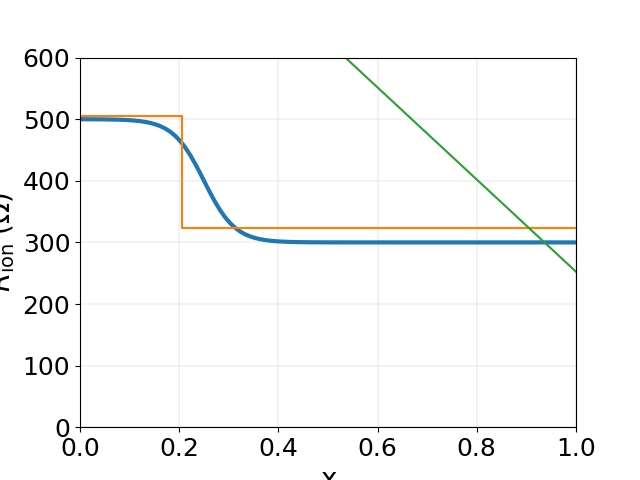

In [23]:
fig1, axx= plt.subplots()
x=np.linspace(0,1,100)
a=4
b=4
def R(x):
    return 100*(a*np.tanh(b**2-a*x)+np.tanh(a-b**2*x))
#plot the arbitray profile
axx.plot(x,R(x),label="Test profile 1",linewidth=3)
# axx.plot(x,R(x))
#plot the fitted profiles
axx.plot([0,delta,delta,1],[R1_two,R1_two,R2_two,R2_two],label="Two-step")
# axx.set_title("Test profile 1")
# axx.set_title("Inverse-Linear resistance profile")
# axx.set_title("Linear resistance profile")
axx.plot([0,1],[R1_lin,R2_lin],label="Linear")

# def R_ilin(x):
#     return 1/(1/R1_ilin+(1/R2_ilin-1/R1_ilin)*x)
# axx.plot(x,R_ilin(x),label="Inverse Linear")

# axx.set_xlim(0,)
axx.set_ylim(0,600)
axx.set_xlim(0,1)
axx.tick_params(labelsize=18)
axx.set_xlabel("x",fontsize=20)
# axx.set_title("Fitted Elementary Profiles")
# axx.set_ylabel("$R_{\mathrm{ion},1}$ or $R_{\mathrm{ion},2}\;$($\Omega$)",fontsize=20)
axx.set_ylabel("$R_{\mathrm{ion}}$$\;$($\Omega$)",fontsize=20)
# axx.legend(fontsize=16,handlelength=0.8)
axx.grid(linewidth=0.2)

# axx.set_title("Fittde")
# fig1.savefig("fitted_prof1.png",dpi=500)
fig1.savefig("figs/two_lin_prof1.png",dpi=500,bbox_inches="tight")
fig1.get_figwidth()
fig1.get_figheight()